# Investigating the Effect of Mutual Nodes on Page Rank

This notebook attempts to address the question: Can you abuse the [Page Rank](https://en.wikipedia.org/wiki/PageRank) system to cause an unpopular site to gain popularity through the use of Mutual Admirers.

-  Mutual Admirer: A node in a network that only has two links. One coming from a site and one going to a site.
    
We determine through linear algebra that you can. In fact, in this specific example, adding just 3 Mutual Nodes causes the least popular site of three to rise to the top. 

To sum up the rules used from the Page Ranking:

-  The value of a node comes from the a value of nodes pointing to it
-  You give 1/n of your value to node you point to for every connection you make
-  The sum of every node's weight must be 1
    
<img src="nodes.gif" alt="Alt text that describes the graphic" title="Title text" />
    

In [60]:
#load SymPy module content
from sympy import *

#this makes printouts of matrices and vectors more readeable:
init_printing(use_latex='mathjax')

In [13]:
#starting with square non-augmented matrix, omit sum of 1 rule for now
template_matrix = Matrix([[1,Rational(-1,2),Rational(-1,2)],[-1,1,Rational(-1,2)],[0,Rational(-1,2),1]])

## Defining Functions to Handle Matrix manipulation

In [14]:
def add_nodes(n, mat):
    #for every connections, we are going to decrease the value of every link we give, so other nodes become less valuable
    total_conn = 2+n
    #strength of links given by our admiree (x_3)
    conn_strength = Rational(-1,total_conn)
    mat[0,2] = conn_strength
    mat[1,2] = conn_strength
    for it in range(n):
        #adding the nth row past 3
        mat = mat.col_join(zeros(1,3+it))
        #adding another column
        mat = mat.row_join(zeros(4+it,1))
        
        #targets new row at the 3rd column
        mat[3+it, 2] = conn_strength
        
        #creates the diagnol
        mat[3+it,3+it] = 1
        
        #targets new column on the 3rd row
        mat[2,3+it] = -1
    return mat

In [15]:
def add_ones_rule_and_augment(n,mat):
    #augments matrix with homogenous info
    mat = mat.row_join(zeros(3+n, 1))
    
    #adds a row that requires all params to sum to 1
    mat = mat.col_join(ones(1,4+n))
    return mat

In [16]:
def output_weights_for_n_nodes(n, in_mat):
    #amount of mutual admirers to be added
    mat_with_nodes = add_nodes(n, in_mat)
    complete_mat = add_ones_rule_and_augment(n,mat_with_nodes)
    r = complete_mat.rref()
    
    #ret answer is the sln for each node in the form of an array
    ans = r[0].col(-1)[:-1]
    return ans

## Bar Graph: Weights after Adding Nodes

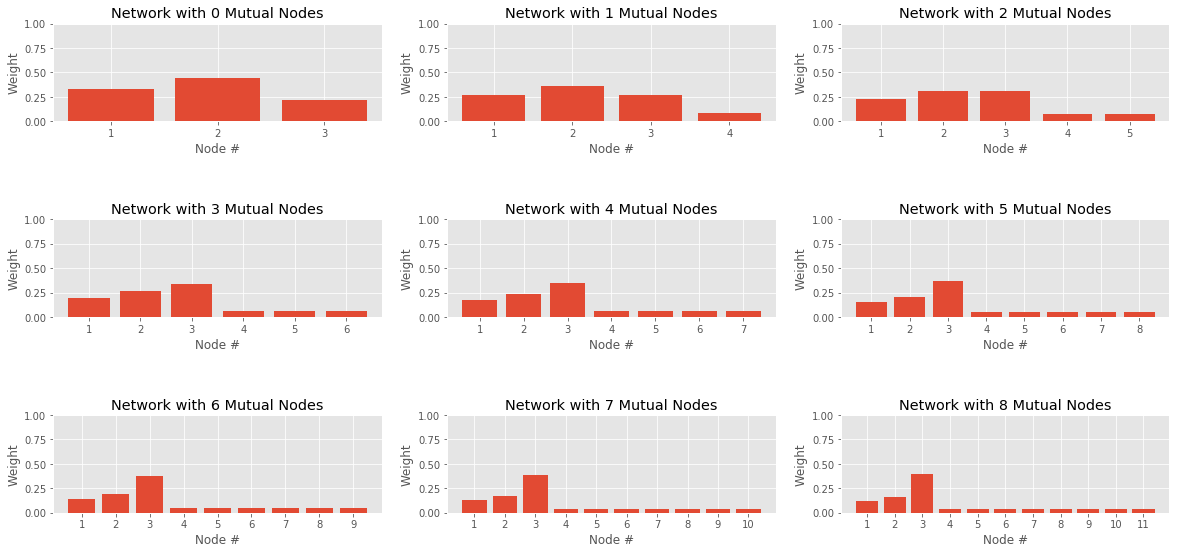

In [58]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,9)
fig, ax = plt.subplots(3, 3)
fig.subplots_adjust(hspace=1)
it = 0
ttrack = []
for ac in ax:
    for a in ac:
        curr_out = output_weights_for_n_nodes(it, template_matrix)
        ttrack.append(curr_out[2])
        a.bar(range(4+it)[1:], curr_out)
        a.set_title("Network with " + str(it) + " Mutual Nodes")
        a.set_ylabel('Weight')
        a.set_xlabel('Node #')
        a.set_ylim([0,1])
        a.set_xticks(range(4+it)[1:])
        it+=1

## Line Plot: Inspecting the Weight of 3

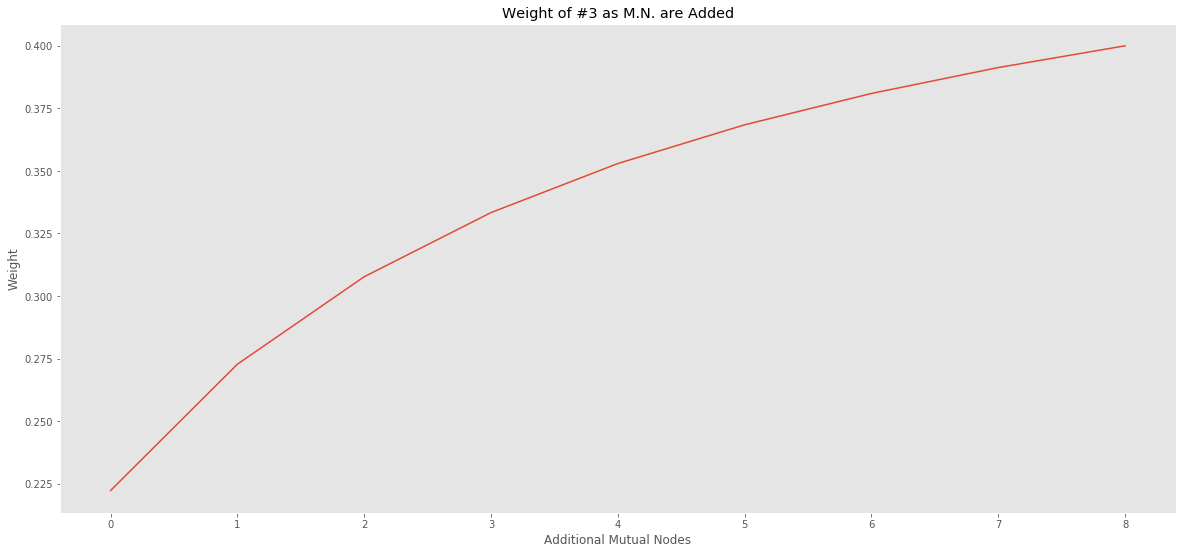

In [56]:
node_three_weight = plt.plot(ttrack)
plt.ylabel("Weight")
plt.xlabel("Additional Mutual Nodes")
plt.title("Weight of #3 as M.N. are Added")
plt.grid(False)